# Import Libraries and Clone Github

In [1]:
# Import Libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import userdata

In [2]:
# Global Variables
SENTIMENT_COLUMNS = [
    'Finance',
    'Production',
    'Reserves / Exploration / Acquisitions / Mergers / Divestments',
    'Environment / Regulatory / Geopolitics',
    'Alternative Energy / Lower Carbon',
    'Oil Price / Natural Gas Price / Gasoline Price']

PALETTE = {'Positive': '#66c2a5', 'Neutral': '#8da0cb', 'Negative': '#fc8d62'}

HUE_ORDER = ['Positive', 'Neutral', 'Negative']

In [3]:
# Import github token with google secrets thingy and clone git repository
GITHUB_TOKEN = userdata.get('github')
os.environ['GITHUB_TOKEN'] = GITHUB_TOKEN
!git clone https://{GITHUB_TOKEN}@github.com/Kussil/Financial_Sentiment_LLM.git

fatal: destination path 'Financial_Sentiment_LLM' already exists and is not an empty directory.


In [4]:
# Import Sentiment Data
sentiment_df = pd.read_csv('/content/Financial_Sentiment_LLM/03_Sentiment_Analysis/Prompt2_Consistency_Check_Sentiment_Analysis_Results.csv')

# Define custom date parsing function as dates are in different formats sometimes
def parse_dates(date):
    """
    Parse dates from multiple formats into datetime objects.

    This function attempts to parse a date string into a pandas datetime object
    using a list of predefined formats. If the date string does not match any
    of the specified formats, it returns `pd.NaT`.

    Supported formats:
    - '%d-%b-%y' (e.g., '17-Aug-22')
    - '%m/%d/%Y' (e.g., '5/11/2024')
    - '%b-%d-%Y' (e.g., 'Apr-26-2024')

    Parameters:
    date (str): The date string to be parsed.

    Returns:
    pd.Timestamp or pd.NaT: The parsed datetime object if successful, or `pd.NaT` if parsing fails.
    """
    for fmt in ('%d-%b-%y', '%m/%d/%Y', '%b-%d-%Y'):
        try:
            return pd.to_datetime(date, format=fmt)
        except ValueError:
            pass
    return pd.NaT

# Apply custom date parsing function
sentiment_df['Date'] = sentiment_df['Date'].apply(parse_dates)
display(sentiment_df.head())

,Source,Unique_ID,Ticker,Date,URL,Finance,Production,Reserves / Exploration / Acquisitions / Mergers / Divestments,Environment / Regulatory / Geopolitics,Alternative Energy / Lower Carbon,Oil Price / Natural Gas Price / Gasoline Price
0,Investment Research,IR-3734 1,HES,NaT,NaN,Neutral,Neutral,Neutral,Negative,Neutral,Neutral
1,Investment Research,IR-3734 2,HES,NaT,NaN,Positive,Neutral,Positive,Negative,Neutral,Positive
2,Investment Research,IR-3734 3,HES,NaT,NaN,Positive,Neutral,Positive,Negative,Neutral,Positive
3,Investment Research,IR-3734 4,HES,NaT,NaN,Positive,Neutral,Positive,Negative,Neutral,Neutral
4,Investment Research,IR-3734 5,HES,NaT,NaN,Positive,Neutral,Negative,Neutral,Neutral,Positive


In [5]:
# Remove the suffix number from the Unique_ID column
sentiment_df['Unique_ID'] = sentiment_df['Unique_ID'].str.replace(r'\s\d+$', '', regex=True)
print(sentiment_df['Unique_ID'].unique())

['IR-3734' 'IR-726' 'IR-299' 'IR-2095' 'IR-4168' 'PQ-2540764382'
 'PQ-2415718613' 'PQ-2641736904' 'PQ-2880296882' 'PQ-2857037564'
 'SEC-110465920132038' 'SEC-9341020000015' 'SEC-9341021000031'
 'SEC-9341019000008' 'SEC-119312519084325' 'EP-210' 'EP-257' 'EP-98'
 'EP-33' 'EP-10' 'EQ-167' 'EQ-7' 'EQ-115' 'EQ-72' 'EQ-132']


# Visualize Results

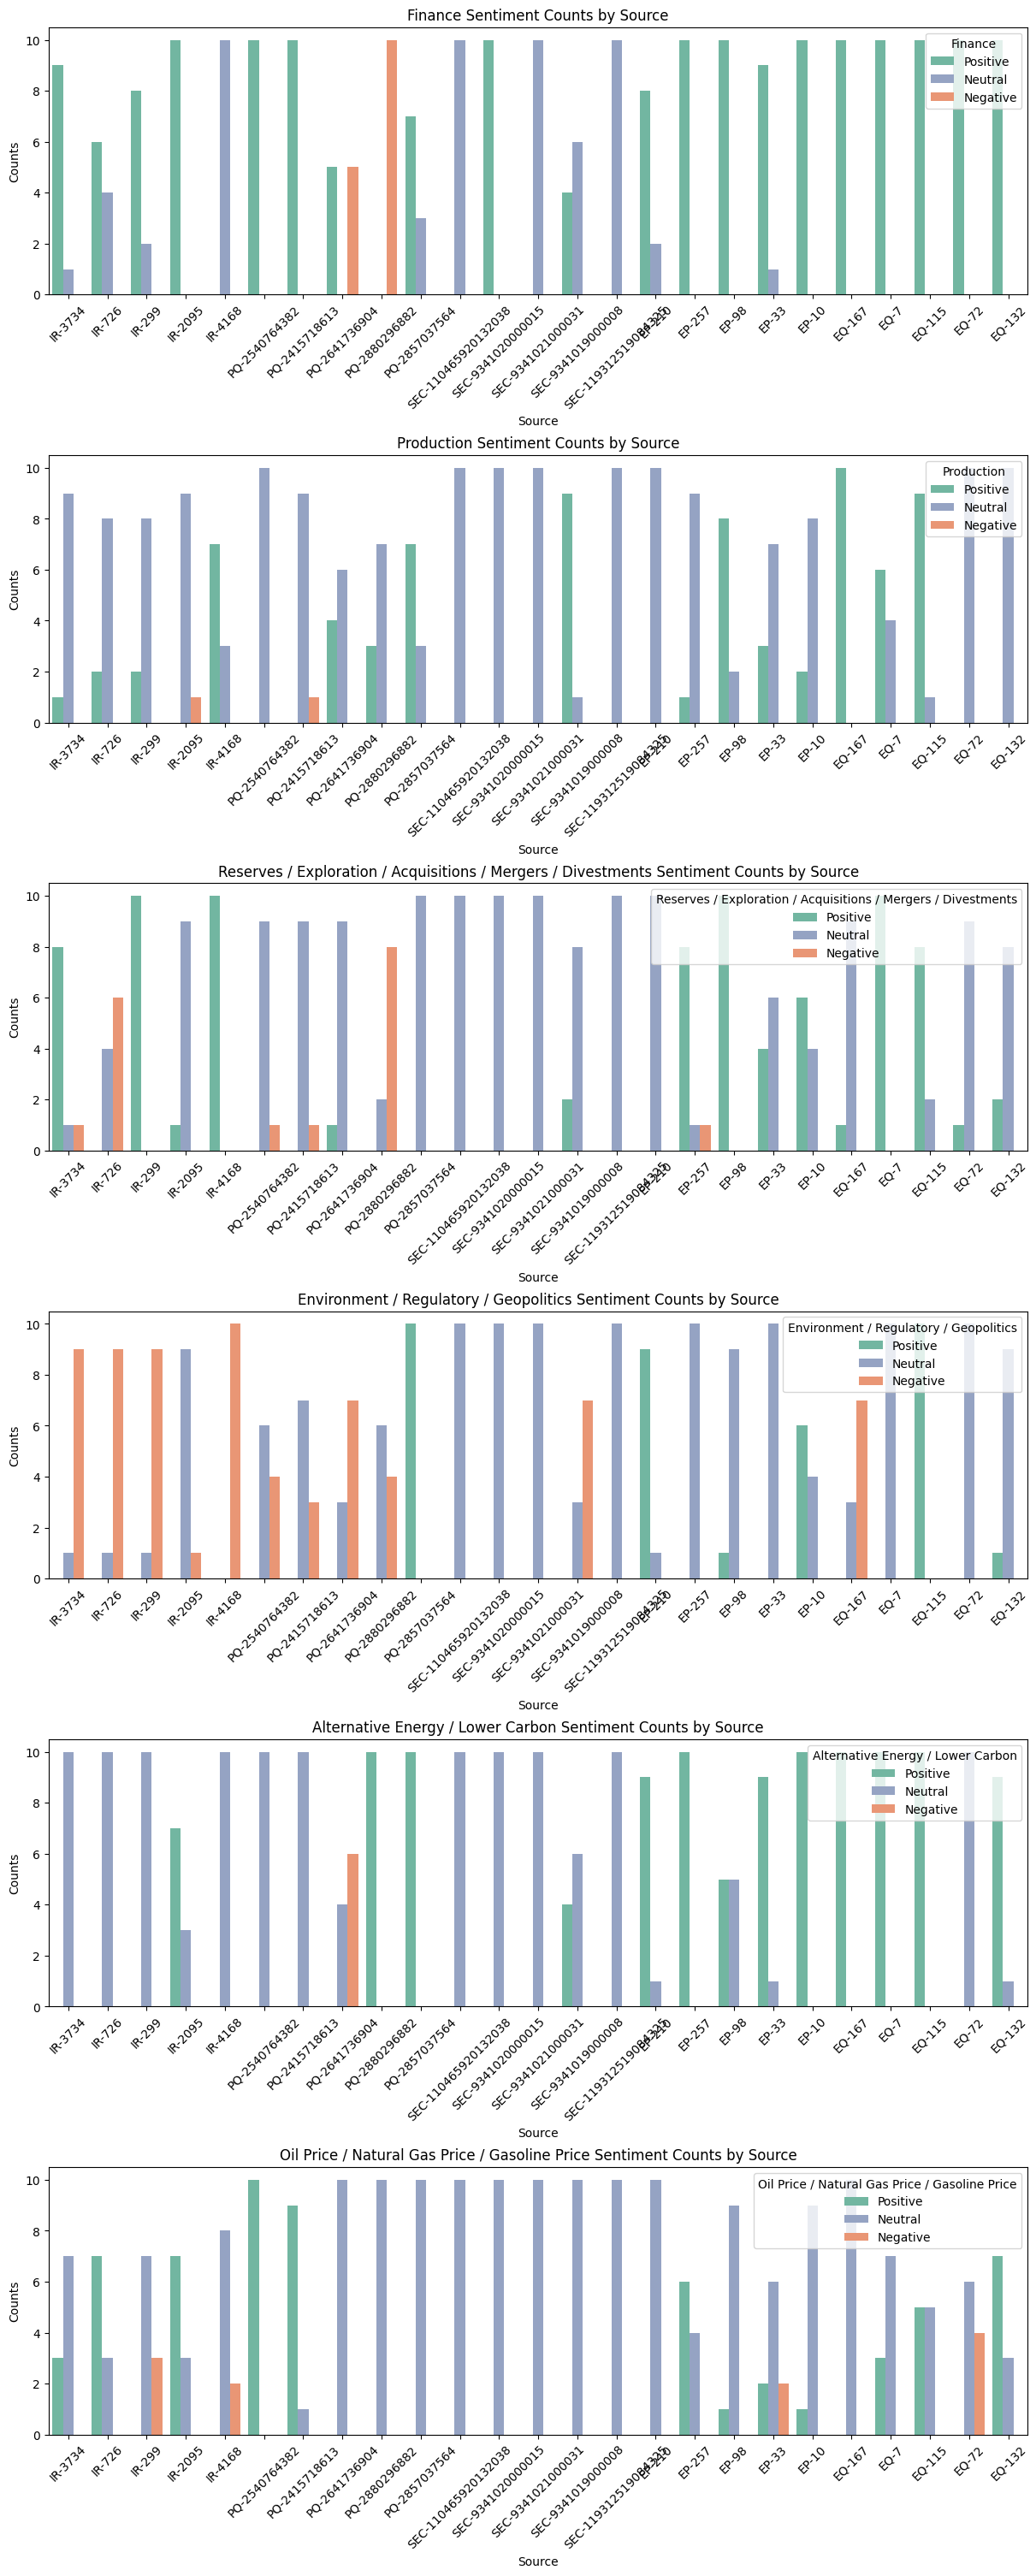

In [6]:
# Plot sentiment counts by category by ID
fig, axes = plt.subplots(nrows=len(SENTIMENT_COLUMNS), ncols=1, figsize=(12, len(SENTIMENT_COLUMNS) * 5), constrained_layout=True)

# Plot each sentiment category
for i, column in enumerate(SENTIMENT_COLUMNS):
    sns.countplot(data=sentiment_df, x='Unique_ID', hue=column, ax=axes[i], palette=PALETTE, hue_order=HUE_ORDER)
    axes[i].set_title(f'{column} Sentiment Counts by Source')
    axes[i].set_xlabel('Source')
    axes[i].set_ylabel('Counts')
    axes[i].tick_params(axis='x', rotation=45)

plt.show()

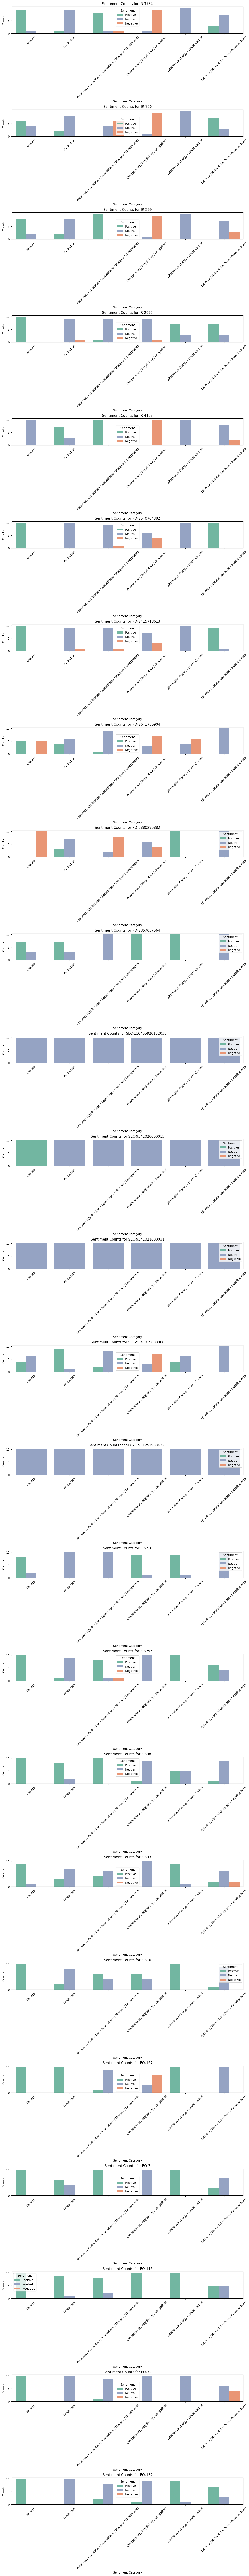

In [7]:
# Plot sentiment counts by ID by Category
fig, axes = plt.subplots(nrows=len(sentiment_df['Unique_ID'].unique()), ncols=1, figsize=(12, len(sentiment_df['Unique_ID'].unique()) * 5), constrained_layout=True)

# Plot each unique ID
for i, unique_id in enumerate(sentiment_df['Unique_ID'].unique()):
    sns.countplot(data=sentiment_df[sentiment_df['Unique_ID'] == unique_id].melt(id_vars=['Unique_ID'], value_vars=SENTIMENT_COLUMNS,
                                                                                var_name='Sentiment Category', value_name='Sentiment'),
                  x='Sentiment Category', hue='Sentiment', ax=axes[i], palette=PALETTE, hue_order=HUE_ORDER)
    axes[i].set_title(f'Sentiment Counts for {unique_id}')
    axes[i].set_xlabel('Sentiment Category')
    axes[i].set_ylabel('Counts')
    axes[i].tick_params(axis='x', rotation=45)

plt.show()

In [8]:
# Pivot df to look at counts
counts_dict = {col: sentiment_df.groupby('Unique_ID')[col].value_counts().unstack(fill_value=0) for col in SENTIMENT_COLUMNS}
counts_df = pd.concat(counts_dict, axis=1)
display(counts_df)

Finance                  Production                   \
Finance             Negative Neutral Positive   Negative Neutral Positive   
Unique_ID                                                                   
EP-10                      0       0       10          0       8        2   
EP-210                     0       2        8          0      10        0   
EP-257                     0       0       10          0       9        1   
EP-33                      0       1        9          0       7        3   
EP-98                      0       0       10          0       2        8   
EQ-115                     0       0       10          0       1        9   
EQ-132                     0       0       10          0      10        0   
EQ-167                     0       0       10          0       0       10   
EQ-7                       0       0       10          0       4        6   
EQ-72                      0       0       10          0      10        0   
IR-2095                    0       0       10          1       9        0   
IR-299                     0       2        8          0       8        2   
IR-3734                    0       1        9          0       9        1   
IR-4168                    0      10        0          0       3        7   
IR-726                     0       4        6          0       8        2   
PQ-2415718613              0       0       10          1       9        0   
PQ-2540764382              0       0       10          0      10        0   
PQ-2641736904              5       0        5          0       6        4   
PQ-2857037564              0       3        7          0       3        7   
PQ-2880296882             10       0        0          0       7        3   
SEC-110465920132038        0      10        0          0      10        0   
SEC-119312519084325        0      10        0          0      10        0   
SEC-9341019000008          0       6        4          0       1        9   
SEC-9341020000015          0       0       10          0      10        0   
SEC-9341021000031          0      10        0          0      10        0   

                    Reserves / Exploration / Acquisitions / Mergers / Divestments  \
Finance                                                                  Negative   
Unique_ID                                                                           
EP-10                                                                0              
EP-210                                                               0              
EP-257                                                               1              
EP-33                                                                0              
EP-98                                                                0              
EQ-115                                                               0              
EQ-132                                                               0              
EQ-167                                                               0              
EQ-7                                                                 0              
EQ-72                                                                0              
IR-2095                                                              0              
IR-299                                                               0              
IR-3734                                                              1              
IR-4168                                                              0              
IR-726                                                               6              
PQ-2415718613                                                        1              
PQ-2540764382                                                        1              
PQ-2641736904                                                        0              
PQ-2857037564                                                        0         

In [9]:
# Calculate consistency percentages
def calculate_consistency_percentage(group):
    consistency_metrics = {}
    for column in SENTIMENT_COLUMNS:
        value_counts = group[column].value_counts()
        most_frequent_count = value_counts.iloc[0]
        total_count = value_counts.sum()
        consistency_percentage = (most_frequent_count / total_count) * 100
        inconsistency_percentage = 100 - consistency_percentage
        consistency_metrics[column + '_consistency'] = consistency_percentage
        consistency_metrics[column + '_inconsistency'] = inconsistency_percentage
    return pd.Series(consistency_metrics)

# Apply the function to each group
consistency_df = sentiment_df.groupby('Unique_ID').apply(calculate_consistency_percentage).reset_index()
display(consistency_df)

,Unique_ID,Finance_consistency,Finance_inconsistency,Production_consistency,Production_inconsistency,Reserves / Exploration / Acquisitions / Mergers / Divestments_consistency,Reserves / Exploration / Acquisitions / Mergers / Divestments_inconsistency,Environment / Regulatory / Geopolitics_consistency,Environment / Regulatory / Geopolitics_inconsistency,Alternative Energy / Lower Carbon_consistency,Alternative Energy / Lower Carbon_inconsistency,Oil Price / Natural Gas Price / Gasoline Price_consistency,Oil Price / Natural Gas Price / Gasoline Price_inconsistency
0,EP-10,100.0,0.0,80.0,20.0,60.0,40.0,60.0,40.0,100.0,0.0,90.0,10.0
1,EP-210,80.0,20.0,100.0,0.0,100.0,0.0,90.0,10.0,90.0,10.0,100.0,0.0
2,EP-257,100.0,0.0,90.0,10.0,80.0,20.0,100.0,0.0,100.0,0.0,60.0,40.0
3,EP-33,90.0,10.0,70.0,30.0,60.0,40.0,100.0,0.0,90.0,10.0,60.0,40.0
4,EP-98,100.0,0.0,80.0,20.0,100.0,0.0,90.0,10.0,50.0,50.0,90.0,10.0
5,EQ-115,100.0,0.0,90.0,10.0,80.0,20.0,100.0,0.0,100.0,0.0,50.0,50.0
6,EQ-132,100.0,0.0,100.0,0.0,80.0,20.0,90.0,10.0,90.0,10.0,70.0,30.0
7,EQ-167,100.0,0.0,100.0,0.0,90.0,10.0,70.0,30.0,100.0,0.0,100.0,0.0
8,EQ-7,100.0,0.0,60.0,40.0,100.0,0.0,100.0,0.0,100.0,0.0,70.0,30.0
9,EQ-72,100.0,0.0,100.0,0.0,90.0,10.0,100.0,0.0,100.0,0.0,60.0,40.0


,Average Consistency
Finance,91.2
Production,86.4
Reserves / Exploration / Acquisitions / Mergers / Divestments,88.0
Environment / Regulatory / Geopolitics,87.6
Alternative Energy / Lower Carbon,92.4
Oil Price / Natural Gas Price / Gasoline Price,84.0


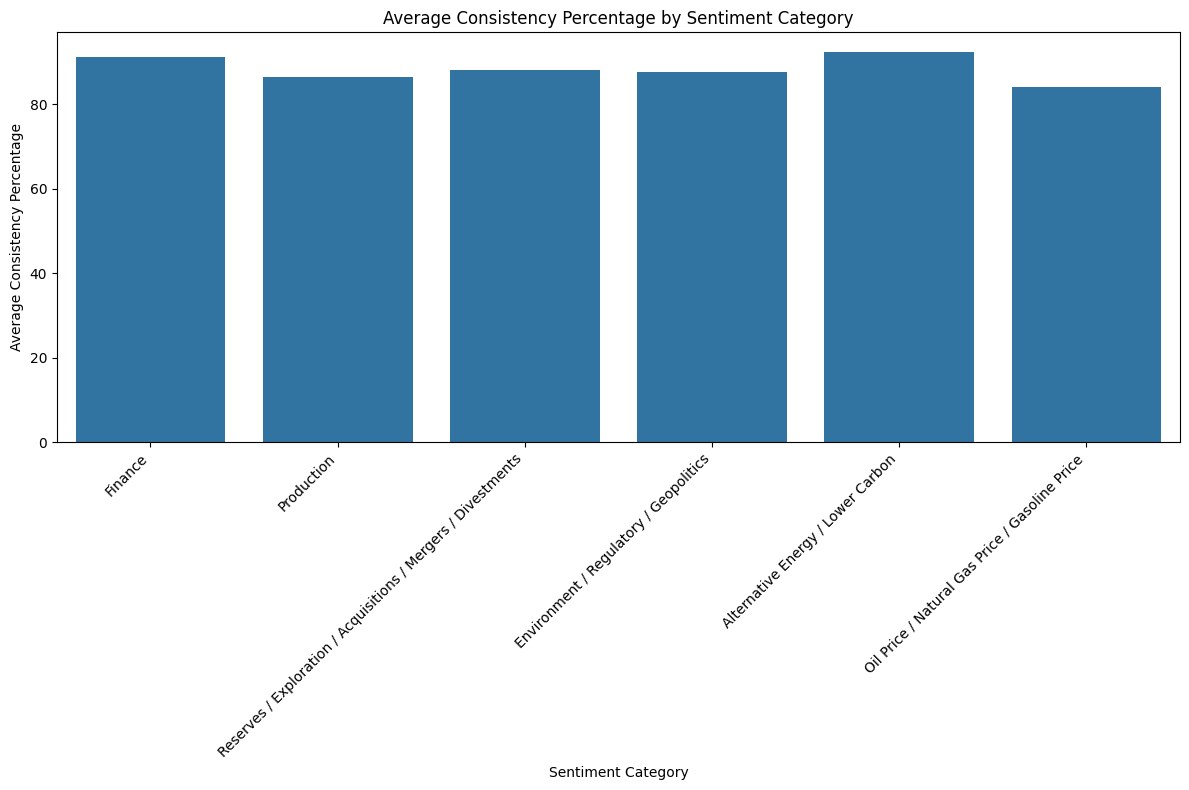

In [10]:
# Average the consistency across articles
average_consistency = consistency_df.filter(like='_consistency').mean().to_frame(name='Average Consistency')
average_consistency.index = [index.replace('_consistency', '') for index in average_consistency.index]
display(average_consistency)

# Plot the average consistency percentages
plt.figure(figsize=(12, 8))
sns.barplot(x=average_consistency.index, y=average_consistency['Average Consistency'])
plt.title('Average Consistency Percentage by Sentiment Category')
plt.xlabel('Sentiment Category')
plt.ylabel('Average Consistency Percentage')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [11]:
# Average across all categories
total_average_consistency = average_consistency['Average Consistency'].mean()
print(f"Total Average Consistency across all categories: {total_average_consistency:.2f}%")

Total Average Consistency across all categories: 88.27%
